Prepare our MQI NCP plots for a variety of graph types

There are  1  connected components in the graph


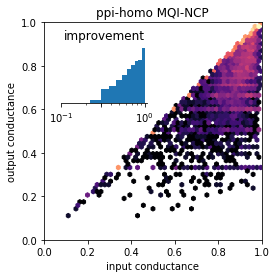

In [41]:
from localgraphclustering import *
import numpy as np

import matplotlib.pyplot as plt


import sys
import os
sys.path.insert(0, os.path.join("..", "LocalGraphClustering", "notebooks"))
import helper

def mqi_ncp_figure(g, nbins=50, use_axes=None, **kwargs):
    ncpdata = ncp.Ncp().produce(g, "mqi", **kwargs)
    #DH, xedges, yedges = np.histogram2d(ncpdata["input_cond"], ncpdata["output_cond"], bins=nbins)
    #X, Y = np.meshgrid(xedges, yedges)
    #fig, ax = plt.subplots()
    #ax.pcolormesh(X, Y, np.log(H.T), cmap="magma")
    fig, ax = plt.subplots()
    ax.hexbin(ncpdata["input_cond"], ncpdata["output_cond"], 
                  gridsize=nbins, cmap="magma", bins='log', mincnt=1)
    ax.set_xlabel("input conductance")
    ax.set_ylabel("output conductance")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_aspect('equal', 'box')
    #axins = inset_axes(ax, width="40%", height="40%", loc=2)
    axins = fig.add_axes([0.3,0.6,0.2,0.2], xscale='log', yscale='log')
    axins.hist(ncpdata["output_cond"]/ncpdata["input_cond"])
    axins.yaxis.set_ticks_position('none') 
    axins.spines['right'].set_visible(False)
    axins.spines['top'].set_visible(False)
    axins.spines['left'].set_visible(False)
    axins.set_title("improvement")
    axins.set_xticks([0.1, 0.3, 1.0])
    axins.set_yticks([])
    #axins.set_aspect('equal')
    return fig, ncpdata

def run_mqi_ncp(g, gname):
    ratio = 1.0
    if g._num_vertices > 5000:
        ratio = 0.8
    elif g._num_vertices > 7500:
        ratio = 0.6
    elif g._num_vertices > 10000:
        ratio = 0.4
    elif g._num_vertices > 100000:
        ratio = 0.1
    elif g._num_vertices > 1000000:
        ratio = 0.05
    fig, ncpdata = mqi_ncp_figure(g, ratio=ratio)
    fig.axes[0].set_title(gname + " MQI-NCP")
    fig.savefig("figures/mqi-ncp-"+gname+".pdf", bbox_inches="tight", figsize=(3,3))
    plt.show()
    
for gname in ["ppi-homo"]:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_mqi_ncp(g, gname)    

There are  1  connected components in the graph


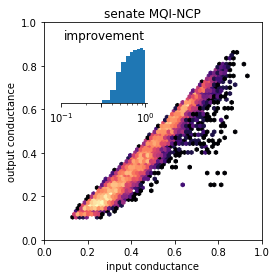

There are  1  connected components in the graph


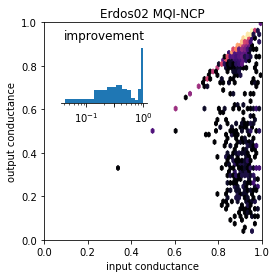

There are  24  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/graph_class_local.py:501: UserWarning: The graph has multiple (24) components, using the largest with 5157 / 5180 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))


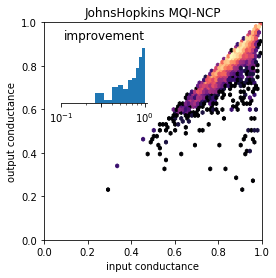

/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/graph_class_local.py:350: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


There are  1  connected components in the graph


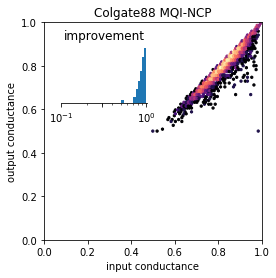

There are  1  connected components in the graph


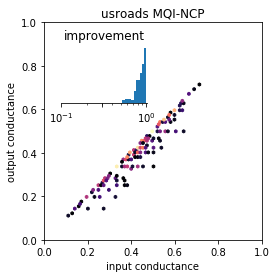

There are  1  connected components in the graph


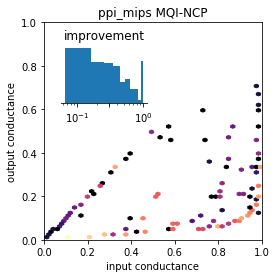

There are  1  connected components in the graph


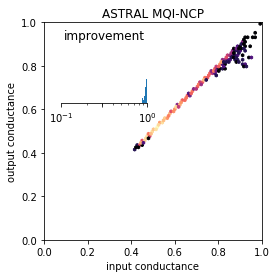

There are  1  connected components in the graph


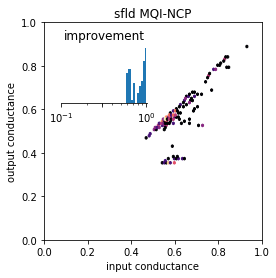

There are  1  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/NCPAlgo.py:37: RuntimeWarning: invalid value encountered in double_scalars
  isop = cut / sizeeff


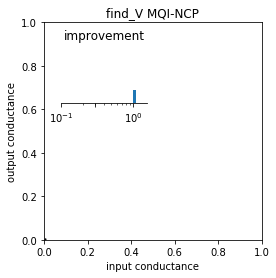

There are  1  connected components in the graph


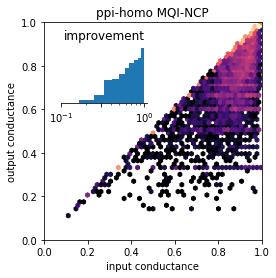

There are  738  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/graph_class_local.py:501: UserWarning: The graph has multiple (738) components, using the largest with 5725 / 6476 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))


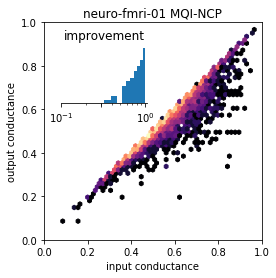

In [42]:
for gname in helper.lgc_graphlist:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_mqi_ncp(g, gname)

There are  1  connected components in the graph


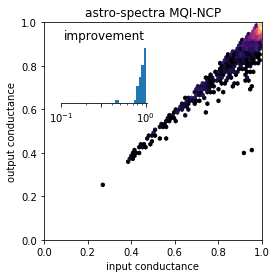

In [43]:
g = graph_class_local.GraphLocal("../data/lawlor-spectra-k32.edgelist.gz", 
                                 'edgelist', '\t')
run_mqi_ncp(g, 'astro-spectra')

In [ ]:
mygraphs = {'digits-1234-3':'digits-1234-3.edges', 
            'neurosynth':'neurosynth-meta.edges.gz',
            'wiki-cats':'wiki-cats.edges', 
            'pokec':'soc-pokec.edges.gz',
            'livejournal':'soc-LiveJournal-scc.edges.gz',
           }

for (gname,gfile) in mygraphs.items():
    g = graph_class_local.GraphLocal(os.path.join("..", "data", gfile),
                                 'edgelist', ' ')
    g.discard_weights()
    run_mqi_ncp(g, gname)


There are  1  connected components in the graph


In [ ]:
g = graph_class_local.GraphLocal(os.path.join("..", "data", "ppi-homo.edges"),
                                 'edgelist', ' ')
fig, ncpdata = mqi_ncp_figure(g, ratio=1)

In [ ]:
g = graph_class_local.GraphLocal(os.path.join("..", "data", "wiki-cats.edges"),
                                 'edgelist', ' ')
fig, ncpdata = mqi_ncp_figure(g)

In [ ]:
g = graph_class_local.GraphLocal(os.path.join("..", "data", "soc-pokec.edges.gz"),
                                 'edgelist', ' ')
fig, ncpdata = mqi_ncp_figure(g)
fig